This is a **Keras** implementation of an **image classifier** following this [blog post](http://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html).
<br>
The data comes from the following [Kaggle challenge](https://www.kaggle.com/c/dogs-vs-cats/data)

Notice that you will need to install the requirements in the `requirements.txt` file by running: <br>
    `pip install -r requirements.txt`

In [40]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import pandas as pd
import numpy as np
import h5py

## Images preprocessing

In [5]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

### An example of an image transformation for data augmentation

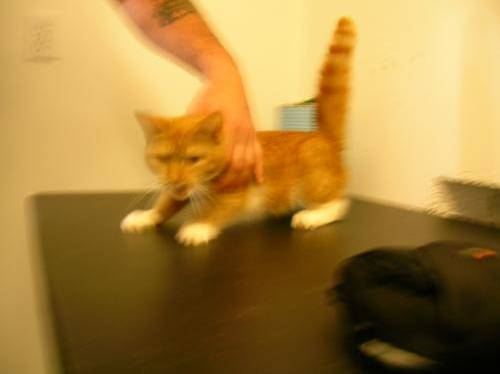

In [23]:
img = load_img('data/train/cats/cat.0.jpg')  # this is a PIL image
img

In [14]:
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='preview', save_prefix='cat', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

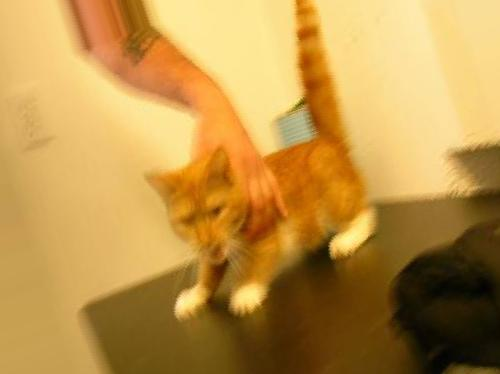

In [22]:
transformed_img = load_img('preview/cat_0_1582.jpeg')  # this is a transformed cat image
transformed_img

## Building the model

In [25]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(3, 150, 150)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# the model so far outputs 3D feature maps (height, width, features)
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

## Compiling the model


In [26]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

## Train and test pipelines

In [18]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'data/train',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=32,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        'data/validation',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 13500 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


## Fit the model

In [31]:
model.fit_generator(
        train_generator,
        samples_per_epoch=2000,
        nb_epoch=50,
        validation_data=validation_generator,
        nb_val_samples=800)

Epoch 1/50
1984/2000 [============================>.] - ETA: 1s - loss: 0.3330 - acc: 0.9158

/home/yassine/Envs/deep-learning/lib/python3.4/site-packages/keras/engine/training.py:1403: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '


2016/2000 [==============================] - 201s - loss: 0.3308 - acc: 0.9162 - val_loss: 1.6590 - val_acc: 0.5000
Epoch 2/50
2016/2000 [==============================] - 199s - loss: 0.3091 - acc: 0.9226 - val_loss: 1.4462 - val_acc: 0.5000
Epoch 3/50
2016/2000 [==============================] - 200s - loss: 0.2856 - acc: 0.9256 - val_loss: 1.3420 - val_acc: 0.5000
Epoch 4/50
2016/2000 [==============================] - 212s - loss: 0.2840 - acc: 0.9246 - val_loss: 1.1973 - val_acc: 0.5000
Epoch 5/50
2016/2000 [==============================] - 209s - loss: 0.2498 - acc: 0.9355 - val_loss: 1.3032 - val_acc: 0.5000
Epoch 6/50
2016/2000 [==============================] - 216s - loss: 0.2928 - acc: 0.9211 - val_loss: 1.3065 - val_acc: 0.5000
Epoch 7/50
2012/2000 [==============================] - 196s - loss: 0.2797 - acc: 0.9289 - val_loss: 1.6465 - val_acc: 0.5000
Epoch 8/50
2016/2000 [==============================] - 185s - loss: 0.2937 - acc: 0.9196 - val_loss: 1.1894 - val_acc: 0.

ImportError: No module named 'h5py'

In [41]:
model.save_weights('first_try.h5')  # always save your weights after training or during training